In [1]:
import pandas as pd
import pickle


### Chicago Public Library - Libraries
Combined 2012 to 2022 Circulation by Location

From [Data.gov](https://catalog.data.gov/dataset/?q=chicago+%22circulation+by+location%22).

- Could break up into multiple csvs to allow for [looping over data sets](https://librarycarpentry.org/lc-python-intro/13-looping-data-sets.html)


In [2]:
df = pd.read_csv('chicago_circ_by_location.csv')

In [3]:
df.columns = df.columns.str.lower() 

In [4]:
df.columns

Index(['branch', 'address', 'city', 'zip code', 'january', 'february', 'march',
       'april', 'may', 'june', 'july', 'august', 'september', 'october',
       'november', 'december', 'ytd', 'year'],
      dtype='object')

In [5]:
df.branch.unique()

array(['Albany Park', 'Altgeld', 'Archer Heights', 'Austin',
       'Austin-Irving', 'Avalon', 'Back of the Yards', 'Beverly',
       'Bezazian', 'Blackstone', 'Brainerd', 'Brighton Park',
       'Bucktown-Wicker Park', 'Budlong Woods', 'Canaryville',
       'Chicago Bee', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Coleman',
       'Daley, Richard J. - Bridgeport', 'Daley, Richard M. - W Humboldt',
       'Douglass', 'Dunning', 'Edgebrook', 'Edgewater', 'Gage Park',
       'Galewood-Mont Clare', 'Garfield Ridge', 'Greater Grand Crossing',
       'Hall', 'Harold Washington Library Center', 'Hegewisch',
       'Humboldt Park', 'Independence', 'Jefferson Park', 'Jeffery Manor',
       'Kelly', 'King', 'Legler Regional', 'Lincoln Belmont',
       'Lincoln Park', 'Little Village', 'Logan Square', 'Lozano',
       'Manning', 'Mayfair', 'McKinley Park', 'Merlo', 'Mount Greenwood',
       'Near North', 'North Austin', 'North Pulaski', 'Northtown',
       'Oriole Park', 'Portage-Cragin', 'Pullma

In [277]:
df.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [278]:
years = df.year.unique().tolist()
years.sort()

In [279]:
months = ['january', 'february', 'march',
       'april', 'may', 'june', 'july', 'august', 'september', 'october',
       'november', 'december']

for month in months:
    print(month, '\nMax:', df[month].max(), df.loc[df[month].idxmax()]['branch'], '\nMean:', df[month].mean(), '\n') 

january 
Max: 671609 Renewals - Auto 
Mean: 10662.7666999003 

february 
Max: 646073 Renewals - Auto 
Mean: 9844.878364905284 

march 
Max: 703214 Renewals - Auto 
Mean: 11135.676969092721 

april 
Max: 897679 Renewals - Auto 
Mean: 10781.22033898305 

may 
Max: 823205 Renewals - Auto 
Mean: 10359.097706879362 

june 
Max: 747729 Renewals - Auto 
Mean: 10766.769690927218 

july 
Max: 631669 Renewals - Auto 
Mean: 11350.51445663011 

august 
Max: 611469 Renewals - Auto 
Mean: 11322.272183449651 

september 
Max: 748206 Renewals - Auto 
Mean: 10929.097706879362 

october 
Max: 602692 Renewals - Auto 
Mean: 11543.85443668993 

november 
Max: 692813 Renewals - Auto 
Mean: 11093.359920239282 

december 
Max: 687304 Renewals - Auto 
Mean: 10632.224327018943 



In [281]:
df.set_index(['branch','year'], inplace = True)
df.head(5)

,,address,city,zip code,january,february,march,april,may,june,july,august,september,october,november,december,ytd
branch,year,,,,,,,,,,,,,,,,
Albany Park,2011,5150 N. Kimball Ave.,Chicago,60625.0,8427,7023,9702,9344,8865,11650,11778,11306,10466,10997,10567,9934,120059
Altgeld,2011,13281 S. Corliss Ave.,Chicago,60827.0,1258,708,854,804,816,870,713,480,702,927,787,692,9611
Archer Heights,2011,5055 S. Archer Ave.,Chicago,60632.0,8104,6899,9329,9124,7472,8314,8116,9177,9033,9709,8809,7865,101951
Austin,2011,5615 W. Race Ave.,Chicago,60644.0,1755,1316,1942,2200,2133,2359,2080,2405,2417,2571,2233,2116,25527
Austin-Irving,2011,6100 W. Irving Park Rd.,Chicago,60634.0,12593,11791,14807,14382,11754,14402,14605,15164,14306,15357,14069,12404,165634


<Axes: xlabel='year'>

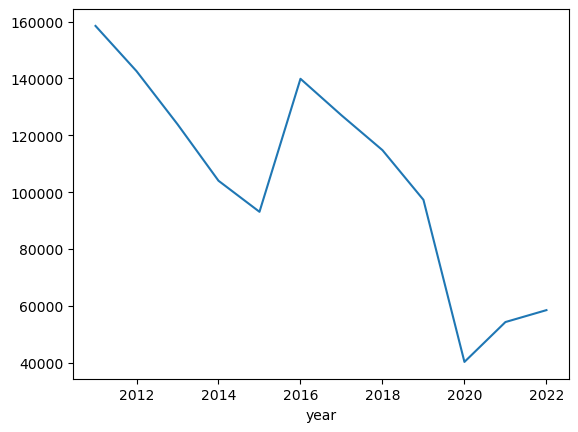

In [282]:
df.loc['Chinatown', :]['ytd'].plot(kind='line')

<Axes: xlabel='year'>

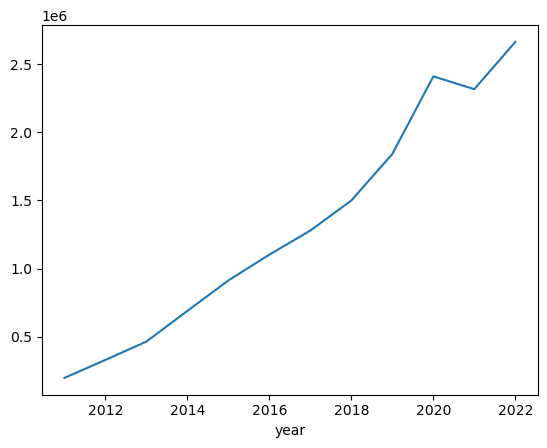

In [283]:
df.loc['Downloadable Media', :]['ytd'].plot()

In [264]:
for year in years:
    for month in months:
        print(df.loc['Downloadable Media', year][month], '- ' + str(month) , str(year))

13841 - january 2011
11974 - february 2011
14228 - march 2011
14158 - april 2011
15176 - may 2011
15154 - june 2011
15687 - july 2011
16896 - august 2011
17866 - september 2011
19689 - october 2011
20171 - november 2011
23337 - december 2011
24925 - january 2012
23125 - february 2012
25118 - march 2012
24855 - april 2012
26283 - may 2012
26616 - june 2012
29183 - july 2012
30709 - august 2012
28286 - september 2012
29385 - october 2012
29707 - november 2012
31863 - december 2012
37183 - january 2013
33467 - february 2013
37772 - march 2013
35651 - april 2013
36746 - may 2013
37706 - june 2013
41277 - july 2013
41874 - august 2013
39702 - september 2013
40947 - october 2013
39736 - november 2013
42608 - december 2013
47023 - january 2014
41299 - february 2014
46942 - march 2014
54642 - april 2014
55598 - may 2014
57774 - june 2014
61783 - july 2014
63758 - august 2014
61432 - september 2014
62406 - october 2014
66028 - november 2014
71276 - december 2014
75946 - january 2015
67991 - feb